In [66]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,BB_SMA,BB_STD,Upper_Band,Lower_Band,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,,,
1993-02-26,24.713381,24.730772,24.591640,24.730772,66200,24.639475,0.314564,24.954039,24.324911,NaN,NaN,NaN
1993-03-01,24.643818,24.800342,24.609035,24.800342,66500,24.649041,0.311473,24.960514,24.337567,0.0,-0.002815,0.000000
1993-03-02,25.009048,25.009048,24.626434,24.661217,182400,24.668171,0.321597,24.989768,24.346574,0.0,0.011964,0.000000
1993-03-03,25.113401,25.130793,25.009052,25.043835,280100,24.689911,0.336682,25.026593,24.353229,1.0,0.016186,0.004173
1993-03-04,24.974268,25.148183,24.974268,25.148183,89500,24.691650,0.338126,25.029776,24.353524,1.0,0.010557,-0.001391
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-28,550.849976,553.549988,545.020020,551.390015,47613800,534.419498,19.276850,553.696348,515.142647,0.0,21.289543,-0.868814
2025-04-29,554.320007,555.450012,548.549988,548.909973,47775100,534.165997,18.961957,553.127954,515.204040,0.0,21.429955,-0.868814
2025-04-30,554.539978,556.520020,541.520020,547.570007,93101500,533.844498,18.533241,552.377739,515.311257,1.0,21.438855,-0.868762


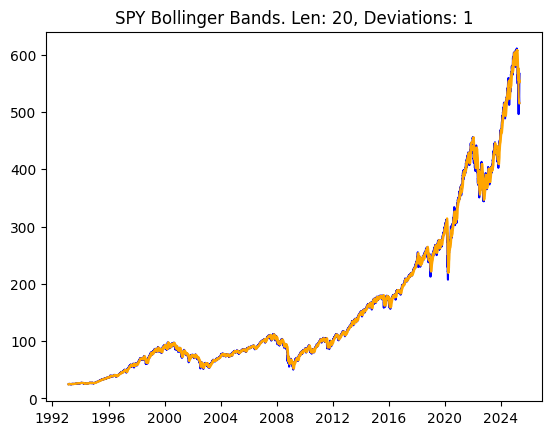

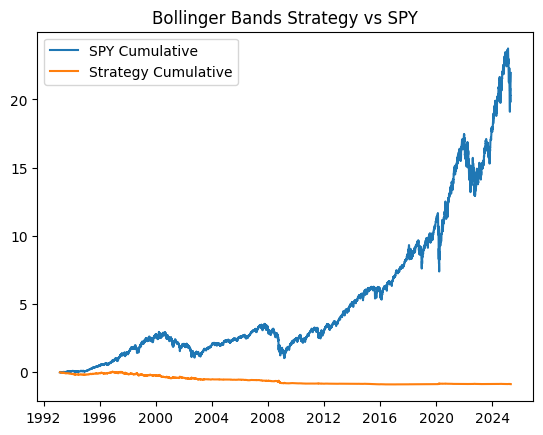

In [67]:
TICKER = 'SPY'
BB_LEN = 20
DEVS = 1
LOOKBACK = 10000

def get_data(ticker=TICKER, lookback=LOOKBACK):
    df = yf.download(ticker)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-lookback:, :]

def add_bollinger_bands(df, devs=DEVS, bb_len=BB_LEN):

    # can change to ema (use MACD video/code for reference)
    df['BB_SMA'] = df['Close'].rolling(bb_len).mean()

    # get the standard deviation of the close prices for the period
    df['BB_STD'] = df['Close'].rolling(bb_len).std()

    df['Upper_Band'] = df['BB_SMA'] + (devs * df['BB_STD'])
    df['Lower_Band'] = df['BB_SMA'] - (devs * df['BB_STD'])

    df = df.dropna()

    plt.plot(df['Close'], color='blue')
    plt.plot(df['Upper_Band'], color='orange')
    plt.plot(df['Lower_Band'], color='orange')

    plt.title(f'{TICKER} Bollinger Bands. Len: {BB_LEN}, Deviations: {DEVS}');

    return df

def add_strategy(df):
    df['Strategy'] = 0
    df['Strategy'] = np.where(
        df['Close'] > df['Upper_Band'], 1, 
        np.where(df['Close'] < df['Lower_Band'], -1, 0)
        )
    
    df['Strategy'] = df['Strategy'].shift(1)
    
    return df

def test_strategy(df):

    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    # plot the strategy returns
    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{TICKER} Cumulative', 'Strategy Cumulative'])
    plt.title(F'Bollinger Bands Strategy vs {TICKER}');

    return df


def main():
    df = get_data()
    df = add_bollinger_bands(df)
    df = add_strategy(df)
    df = test_strategy(df)

    return df

df = main()

df